In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

In [3]:
from tda.experiments.mahalanobis.mahalanobis_binary import Config, run_experiment, get_feature_datasets, evaluate_detector, \
    compute_means_and_sigmas_inv, get_config, logger
from tda.models.architectures import mnist_lenet, get_architecture, mnist_mlp
from tda.models.datasets import Dataset
from tda.models import get_deep_model

2020-01-27 12:18:23,120 - Devices - INFO - Found 0 compatible with CUDA


In [4]:
config = Config(
    # Number of epochs for the model
    epochs = 50,
    # Dataset we consider (MNIST, SVHN)
    dataset = "MNIST",
    # Name of the architecture
    architecture = mnist_lenet.name,
    # Size of the dataset used for the experiment
    dataset_size = 100,
    # Type of attack (FGSM, BIM, CW)
    attack_type = "FGSM",
    # Epsilon for the preprocessing step (see the paper)
    preproc_epsilon = 0.0,
    # Noise to consider for the noisy samples
    noise = 0.0,
    # Number of sample per class to estimate mu_class and sigma_class
    number_of_samples_for_mu_sigma = 100,
    # Should we filter out non successful_adversaries
    successful_adv = 0
)

In [5]:
dataset = Dataset(name=config.dataset)

architecture = get_deep_model(
    num_epochs=config.epochs,
    dataset=dataset,
    architecture=get_architecture(config.architecture),
    train_noise=0.0
)

mean_per_class, sigma_per_class_inv = compute_means_and_sigmas_inv(
    config=config,
    dataset=dataset,
    architecture=architecture
)

2020-01-27 12:18:35,475 - Models - INFO - Filename = /Users/t.ricatte/dev/tda_for_adv_robustness/tda/../trained_models/mnist_mnist_lenet_50_epochs.model 

/Users/t.ricatte/dev/tda_env/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'tda.models.architectures.Architecture' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
2020-01-27 12:18:35,510 - Models - INFO - Loaded successfully model from /Users/t.ricatte/dev/tda_for_adv_robustness/tda/../trained_models/mnist_mnist_lenet_50_epochs.model
2020-01-27 12:18:35,511 - Mahalanobis - INFO - I am going to go through a dataset of 100 points...
2020-01-27 12:18:35,685 - Mahalanobis - INFO - All indices for features are [-1, 0, 1, 2, 3, 4, 5, 6, 7]
2020-01-27 12:18:35,686 - Mahalanobis - INFO - All classes are [0, 1, 

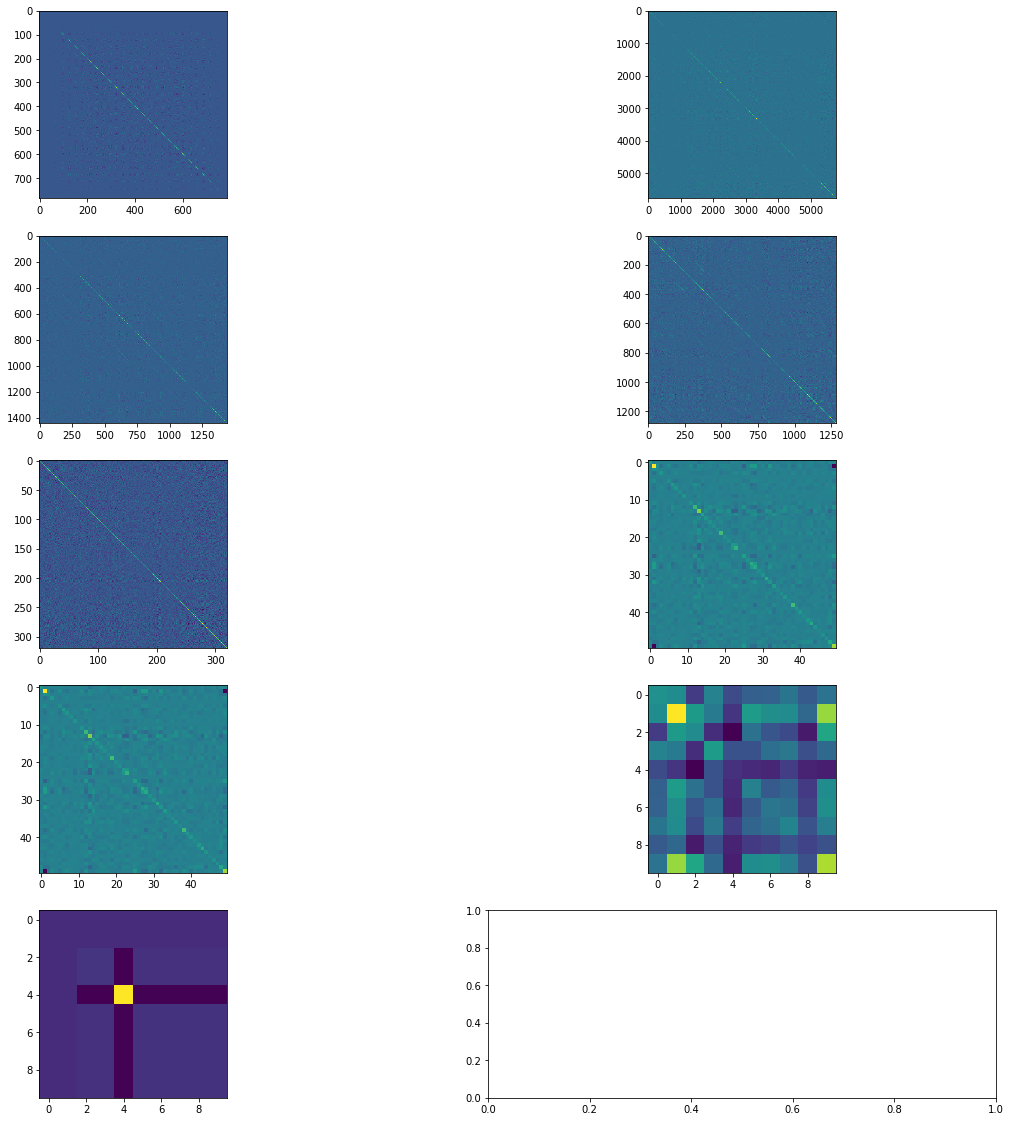

In [6]:
fig, axs = plt.subplots(len(sigma_per_class_inv)//2+1, 2)
i = 0

for layer_idx in sigma_per_class_inv:
    px = i // 2
    py = i % 2
    axs[px][py].imshow(sigma_per_class_inv[layer_idx])
    i+=1

In [7]:
datasets = dict()
for epsilon in [0.01, 0.025, 0.05, 0.1, 0.4, 1.0]:
    ds_train, ds_test = get_feature_datasets(
        config=config,
        epsilon=epsilon,
        dataset=dataset,
        architecture=architecture,
        mean_per_class=mean_per_class,
        sigma_per_class_inv=sigma_per_class_inv
    )
    
    datasets[epsilon] = (ds_train, ds_test)

2020-01-27 12:19:53,477 - Mahalanobis - INFO - All indices for features are [-1, 0, 1, 2, 3, 4, 5, 6, 7]
2020-01-27 12:19:53,478 - Mahalanobis - INFO - All classes are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-01-27 12:19:53,479 - Mahalanobis - INFO - Evaluating epsilon=0.01 / num_iter=50
2020-01-27 12:19:53,480 - Cache - INFO - Using cache file /Users/t.ricatte/dev/tda_for_adv_robustness/tda/../cache/get_sample_dataset/adv=False_archi=mnist_lenet_attack_type=FGSM_dataset=mnist_dataset_size=100_epsilon=0.01_noise=0.0_num_iter=50_succ_adv=False_train=False.cached for the call to get_sample_dataset
2020-01-27 12:20:10,724 - Mahalanobis - INFO - Generated clean dataset for detector !
2020-01-27 12:20:10,726 - Cache - INFO - Using cache file /Users/t.ricatte/dev/tda_for_adv_robustness/tda/../cache/get_sample_dataset/adv=True_archi=mnist_lenet_attack_type=FGSM_dataset=mnist_dataset_size=100_epsilon=0.01_noise=0.0_num_iter=50_succ_adv=False_train=False.cached for the call to get_sample_dataset
202

In [ ]:
#datasets = dict()
#for num_iter in [1, 5, 10, 20, 30, 50]:
#    ds_train, ds_test = get_feature_datasets(
#        config=config,
#        epsilon=1.0,
#        num_iter=num_iter,
#        dataset=dataset,
#        architecture=architecture,
#        mean_per_class=mean_per_class,
#        sigma_per_class_inv=sigma_per_class_inv
#    )
#    
#    datasets[num_iter] = (ds_train, ds_test)

In [8]:
datasets[1.0][0]

,layer_-1,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,label,l2_norm,linf_norm
80,82.610461,89.283434,74.209260,77.879698,113.155142,63.869024,63.869024,12.356721,5.841320e-01,0,0.000000,0.0
53,131.027685,107.054360,108.178779,131.708931,195.248196,205.313584,205.313584,36.995043,5.815071e-01,0,0.000000,0.0
23,66.012261,63.229033,51.471108,68.416526,104.407549,60.278089,60.278089,3.247493,4.152149e-21,0,0.000000,0.0
92,125.518196,126.942087,124.839022,121.368817,223.913672,85.138455,85.138455,4.890900,3.174603e+00,0,0.000000,0.0
7,166.418773,137.154202,131.953891,138.688908,230.535843,217.208330,217.208330,31.701857,7.580728e-01,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,335.283082,234.893764,342.719137,168.912823,293.657953,261.506059,261.506059,43.975523,1.757810e+07,1,19.580227,1.0
25,406.939499,221.440128,275.362629,155.861233,329.742597,425.142356,425.142356,55.826726,1.779676e+11,1,18.829363,1.0
56,313.034185,273.057856,462.042027,194.755500,480.387299,473.258673,473.258673,67.658078,6.247981e+00,1,19.787749,1.0
41,356.903957,211.901856,268.753314,154.037105,283.357790,420.838086,420.838086,32.492343,6.633251e+08,1,18.678015,1.0


## Supervised Learning

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import numpy as np

scaler = StandardScaler()

aucs = dict()
coefs = dict() 

for key in datasets:
    
    ds_train, ds_test = datasets[key]
    
    typ_detector = "LR"
    
    if typ_detector == "LR":
        detector = LogisticRegression(
        fit_intercept=True,
        verbose=0,
        tol=1e-9,
        max_iter=100000,
        solver='lbfgs'
    )
    elif typ_detector == "SVM":
        detector = SVC(
            tol=1e-5,
            C=1.0,
            kernel="rbf",
            verbose=False,
            max_iter=10000,
            gamma='scale'
        )
    else:
        raise NotImplementedError(f"Unknown detector method {typ_detector}")
        
    ds_train_scaled = scaler.fit_transform(ds_train.iloc[:, :-3])

    detector.fit(X=ds_train_scaled, y=ds_train.iloc[:, -3])
    #coef = list(detector.coef_.flatten())
    #logger.info(f"Coefs of detector {coef}")
    #logger.info(f"Intercept of detector {detector.intercept_}")
    
    ds_test_scaled = scaler.transform(ds_train.iloc[:, :-3])
    
    train_predictions = detector.predict_proba(X=ds_train_scaled)[:, 1]
    
    test_predictions = detector.predict_proba(X=ds_test_scaled)[:, 1]
    logger.info(f"Average prediction {np.mean(test_predictions)}")
    auc = roc_auc_score(y_true=ds_test.iloc[:, -3], y_score=test_predictions)
    
    logger.info(f"AUC for {key} => {auc}")

    aucs[key] = auc
    #coefs[key] = coef
    
logger.info(f"All AUCS are {aucs}")

2020-01-27 12:26:33,022 - Mahalanobis - INFO - Average prediction 0.4999993913308371
2020-01-27 12:26:33,027 - Mahalanobis - INFO - AUC for 0.01 => 0.5764
2020-01-27 12:26:33,035 - Mahalanobis - INFO - Average prediction 0.4999976665255631
2020-01-27 12:26:33,038 - Mahalanobis - INFO - AUC for 0.025 => 0.5700000000000001
2020-01-27 12:26:33,047 - Mahalanobis - INFO - Average prediction 0.5000030437133798
2020-01-27 12:26:33,050 - Mahalanobis - INFO - AUC for 0.05 => 0.6448
2020-01-27 12:26:33,064 - Mahalanobis - INFO - Average prediction 0.4999975392566994
2020-01-27 12:26:33,067 - Mahalanobis - INFO - AUC for 0.1 => 0.8200000000000001
2020-01-27 12:26:33,079 - Mahalanobis - INFO - Average prediction 0.5000007820712355
2020-01-27 12:26:33,083 - Mahalanobis - INFO - AUC for 0.4 => 0.9824
2020-01-27 12:26:33,095 - Mahalanobis - INFO - Average prediction 0.49999993742801535
2020-01-27 12:26:33,099 - Mahalanobis - INFO - AUC for 1.0 => 1.0
2020-01-27 12:26:33,102 - Mahalanobis - INFO - All

In [10]:
linfs = dict()
l2s = dict()

for key in datasets:
    linf_mean_train = datasets[key][0].query("label > 0").linf_norm.mean()
    l2_mean_train = datasets[key][0].query("label > 0").l2_norm.mean()
    
    linfs[key] = linf_mean_train
    l2s[key] = l2_mean_train

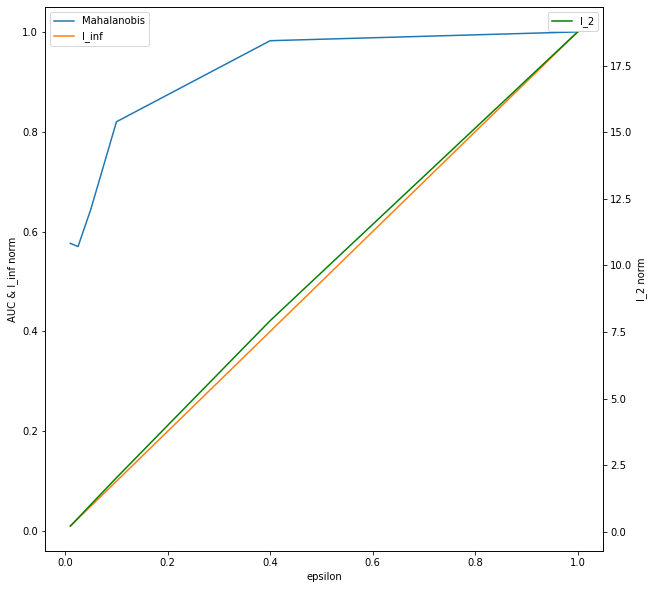

In [11]:
keys = sorted(aucs.keys())
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

fig, ax1 = plt.subplots()

ax1.set_xlabel('epsilon')
ax1.set_ylabel('AUC & l_inf norm')
#plt.xscale('log')
ax1.plot(
    keys, [aucs[k] for k in keys], label="Mahalanobis"
)
ax1.plot(
    keys, [linfs[k] for k in keys], label="l_inf"
)

ax2 = ax1.twinx()
ax2.set_ylabel("l_2 norm")

ax2.plot(
    keys, [l2s[k] for k in keys], label="l_2", color="green"
)

ax1.legend()
ax2.legend()

## Unsupervised Learning

In [23]:
from sklearn.svm import OneClassSVM

scaler = StandardScaler()

aucs = dict()
coefs = dict() 

for key in datasets:
    
    ds_train, ds_test = datasets[key]
    
    detector = OneClassSVM(
        tol=1e-5,
        kernel='rbf',
        nu=0.5
    )
        
    ds_train_scaled = scaler.fit_transform(ds_train.iloc[:, :-3])

    detector.fit(X=ds_train_scaled)
    
    ds_test_scaled = scaler.transform(ds_train.iloc[:, :-3])
    
    train_predictions = detector.decision_function(X=ds_train_scaled)
    
    test_predictions = detector.decision_function(X=ds_test_scaled)
    logger.info(f"Average prediction {np.mean(test_predictions)}")
    auc = roc_auc_score(y_true=ds_test.iloc[:, -3], y_score=test_predictions)
    
    logger.info(f"AUC for {key} => {auc}")

    aucs[key] = auc
    
logger.info(f"All AUCS are {aucs}")

2020-01-27 13:25:28,855 - Mahalanobis - INFO - Average prediction -0.8387503556965479
2020-01-27 13:25:28,857 - Mahalanobis - INFO - AUC for 0.01 => 0.5583999999999999
2020-01-27 13:25:28,863 - Mahalanobis - INFO - Average prediction -1.0847926709565245
2020-01-27 13:25:28,865 - Mahalanobis - INFO - AUC for 0.025 => 0.5092
2020-01-27 13:25:28,871 - Mahalanobis - INFO - Average prediction -0.9499223280785855
2020-01-27 13:25:28,873 - Mahalanobis - INFO - AUC for 0.05 => 0.518
2020-01-27 13:25:28,878 - Mahalanobis - INFO - Average prediction -0.906455017294853
2020-01-27 13:25:28,880 - Mahalanobis - INFO - AUC for 0.1 => 0.5412
2020-01-27 13:25:28,885 - Mahalanobis - INFO - Average prediction -0.9176655047802887
2020-01-27 13:25:28,887 - Mahalanobis - INFO - AUC for 0.4 => 0.4908
2020-01-27 13:25:28,892 - Mahalanobis - INFO - Average prediction -0.8502532682473521
2020-01-27 13:25:28,895 - Mahalanobis - INFO - AUC for 1.0 => 0.3828
2020-01-27 13:25:28,895 - Mahalanobis - INFO - All AUCS 

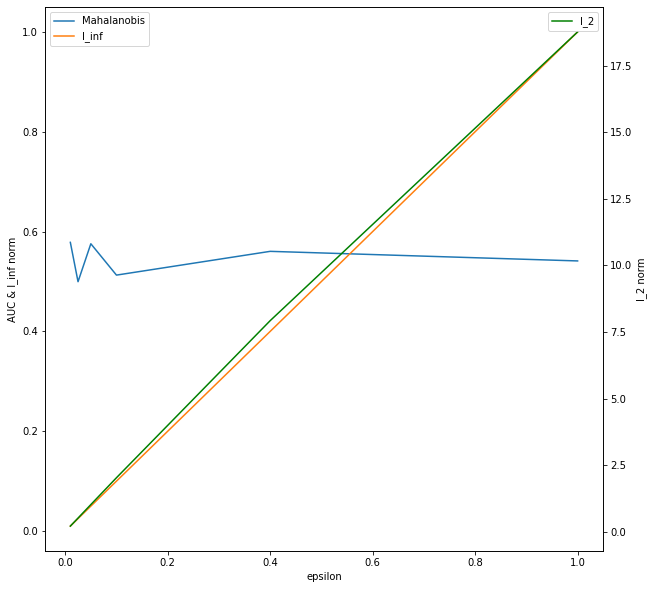

In [22]:
keys = sorted(aucs.keys())
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

fig, ax1 = plt.subplots()

ax1.set_xlabel('epsilon')
ax1.set_ylabel('AUC & l_inf norm')
#plt.xscale('log')
ax1.plot(
    keys, [aucs[k] for k in keys], label="Mahalanobis"
)
ax1.plot(
    keys, [linfs[k] for k in keys], label="l_inf"
)

ax2 = ax1.twinx()
ax2.set_ylabel("l_2 norm")

ax2.plot(
    keys, [l2s[k] for k in keys], label="l_2", color="green"
)

ax1.legend()
ax2.legend()